<a href="https://colab.research.google.com/github/amun83/Financial-Data-Science/blob/master/03-05-Mid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#머신러닝 데이터셋 - 타이타닉
*  타이타닉 탑승객들의 생존 여부에 관한 데이터

##속성 설명
*   Age: Age (38.0, 20.5(추정한 경우))
*   Cabin: 객실
*   Embarked: 출항 소재 (C = Cherbourg; Q = Queenstown; S = Southampton)
*   Fare: 운임(티켓 가격)
*   Name: Name
*   Parch: 부모+자식 탑승인원
*   Pclass: 승객 등급 (1 = 1st; 2 = 2nd; 3 = 3rd)
*   Sex: Sex (man, woman)
*   Sibsp: 형제자매+배우자 탑승인원
*   Survived: 생존 여부 (0 = 사망; 1 = 생존)
*   Ticket: Ticket Number

##레퍼런스 (본 과정 내용)
*   https://nbviewer.jupyter.org/gist/FinanceData/02b5aba7dbcf9f32bddd7c17be5d479a



#데이터 확보

In [0]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/TeamHG-Memex/eli5/master/notebooks/titanic-train.csv')
df.to_csv('titanic-train.csv')

# ELI5
* 훈련을 마친 머신러닝 분류기의 오류를 찾거나 예측결과에 설명력을 더하기 위한 파이썬 패키지
* XGBoost 및 대부분의 scikit-learn tree 앙상블 모형에 대해 적용 가능
* ELI5는 분류 및 회귀 모형에 대해 이뤄지는 두 가지 주요 노력에 대한 솔루션을 제공하고 있음
  1. 모형의 파라메터들을 조사하고, 모델이 전반적으로 작동하는 방식을 분간
  
     ① ELI5.show_weights()
     
     ② Permutation Importance 방식 사용
     
        - 검증 데이터 한 레코드의 특정 속성 값을 noise로 대체한 상태에서 score 계산
        - 가령, 한 레코드에서 성별 속성(male)을 결측 처리(변경)하기 전후 간 score 값 두 개를 비교하여 성별 속성이 얼마나 중요한지를 정량화함
        - 특정 속성 값이 제공되지 않을 때 score가 감소하는 정도를 계산하여 feature importance를 추론함
        - 여기서, 대체된 값(결측)이 noise라는 가정, 즉, 대체값이 score에 큰 영향을 미치지 않는다는 가정 필요
     
  2. 특정 입력값에 대한 모형의 예측을 조사하고, 모형이 내린 결정의 이유를 찾아냄
  
      ① ELI5.show_prediction()
      
      ② LIME 알고리즘이 사용됨





#출처
##(소스 코드)
* https://eli5.readthedocs.io/en/latest/tutorials/xgboost-titanic.html
* https://buildmedia.readthedocs.org/media/pdf/eli5/latest/eli5.pdf

##(기타)
* https://towardsdatascience.com/3-ways-to-interpretate-your-nlp-model-to-management-and-customer-5428bc07ce15

##(LIME)
* https://homes.cs.washington.edu/~marcotcr/blog/lime/

#데이터 읽어오기

In [0]:
import csv
import numpy as np

with open('titanic-train.csv', 'rt') as f:
  
  # csv 각 행을 읽어 -> OrderedDict 타입으로 변환
  # ※ OrderedDict의 key는 fieldnames 옵션으로 지정되나
  #      (ex. reader = csv.DictReader( f, fieldnames = ( "foo","bar","foobar","barfoo" )))
  #    fieldnames 옵션이 부여되지 않은 경우, csv 파일 첫번째 행이 fieldnames으로 사용됨
  data = list(csv.DictReader(f))
    
data[:2]

[OrderedDict([('', '0'),
              ('PassengerId', '1'),
              ('Survived', '0'),
              ('Pclass', '3'),
              ('Name', 'Braund, Mr. Owen Harris'),
              ('Sex', 'male'),
              ('Age', '22.0'),
              ('SibSp', '1'),
              ('Parch', '0'),
              ('Ticket', 'A/5 21171'),
              ('Fare', '7.25'),
              ('Cabin', ''),
              ('Embarked', 'S')]),
 OrderedDict([('', '1'),
              ('PassengerId', '2'),
              ('Survived', '1'),
              ('Pclass', '1'),
              ('Name', 'Cumings, Mrs. John Bradley (Florence Briggs Thayer)'),
              ('Sex', 'female'),
              ('Age', '38.0'),
              ('SibSp', '1'),
              ('Parch', '0'),
              ('Ticket', 'PC 17599'),
              ('Fare', '71.2833'),
              ('Cabin', 'C85'),
              ('Embarked', 'C')])]

In [0]:
dict({1: 2})

{1: 2}

# 입력용과 라벨용 컬럼 분리 후 훈련용, 검증용 데이터 나눔

In [0]:
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

###########################################################################
# 입력 추출
###########################################################################
#(ASIS)
#_all_xs = [{k: v for k, v in row.items() if k != 'Survived'} for row in data]

#(TOBE)
_all_xs = []
for odict_row in data:
  
  dictionary = {}
  
  #레코드 내 컬럼 순환
  for key, value in odict_row.items():
    # 컬럼 'Survived'를 제외한 나머지 속성들만 딕셔너리로 재구성
    if key != 'Survived':      
      dictionary[key] = value
      
  #딕셔너리들을 리스트로 구성
  _all_xs.append(dictionary)

###########################################################################
# 라벨 추출
###########################################################################
#(ASIS)
# _all_ys = np.array([int(row['Survived']) for row in data])
# _all_ys

#(TOBE)
_list_ys = []
for odict_row in data:
  _list_ys.append(int(odict_row['Survived']))
  
_all_ys = np.array(_list_ys)

###########################################################################
# 입력 및 라벨 쌍 순서 섞기
###########################################################################
# _all_xs, _all_ys 두 배열 내 순서가 동일한 원소 쌍을 다른 원소 쌍과 임의로 섞고 그 결과를 반환
# ... 훈련(train) 데이터와 검증(valid) 데이터 추출에 앞서 무작위성 부여
all_xs, all_ys = shuffle(_all_xs, _all_ys, random_state=0)

###########################################################################
# 원천 데이터(입력 및 라벨)을 훈련용과 검증용으로 나눔
###########################################################################
# test_size=0.25 ... 전체 데이터의 25%만 테스트 데이터로 활용
train_xs, valid_xs, train_ys, valid_ys = train_test_split(all_xs, all_ys, test_size=0.25, random_state=0)

print('{} items total, {:.1%} survived'.format(len(all_xs), np.mean(all_ys)))

891 items total, 38.4% survived


In [0]:
# 훈련용 데이터 샘플 ... 딕셔너리 리스트
train_xs[:2]

[{'': '279',
  'Age': '35.0',
  'Cabin': '',
  'Embarked': 'S',
  'Fare': '20.25',
  'Name': 'Abbott, Mrs. Stanton (Rosa Hunt)',
  'Parch': '1',
  'PassengerId': '280',
  'Pclass': '3',
  'Sex': 'female',
  'SibSp': '1',
  'Ticket': 'C.A. 2673'},
 {'': '530',
  'Age': '2.0',
  'Cabin': '',
  'Embarked': 'S',
  'Fare': '26.0',
  'Name': 'Quick, Miss. Phyllis May',
  'Parch': '1',
  'PassengerId': '531',
  'Pclass': '2',
  'Sex': 'female',
  'SibSp': '1',
  'Ticket': '26360'}]

# 문자형 숫자를 숫자형으로 형변환
* Pclass, Sex 등 범주형 데이터들을 전처리 없이 진행  ∵ 이후 DictVectorizer 객체에 의해 one-hot coding 처리됨

In [0]:
for x in all_xs:
  
  # 레코드 내 나이 값이 없으면 나이 속성만 제거
  if x['Age']:
    x['Age'] = float(x['Age'])
  else:
    x.pop('Age')

  x['Fare'] = float(x['Fare'])
  x['SibSp'] = int(x['SibSp'])   #형제자매+배우자 탑승인원
  x['Parch'] = int(x['Parch'])   #부모+자식 탑승인원

In [0]:
all_xs[:3]

[{'': '495',
  'Cabin': '',
  'Embarked': 'C',
  'Fare': 14.4583,
  'Name': 'Yousseff, Mr. Gerious',
  'Parch': 0,
  'PassengerId': '496',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': 0,
  'Ticket': '2627'},
 {'': '648',
  'Cabin': '',
  'Embarked': 'S',
  'Fare': 7.55,
  'Name': 'Willey, Mr. Edward',
  'Parch': 0,
  'PassengerId': '649',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': 0,
  'Ticket': 'S.O./P.P. 751'},
 {'': '278',
  'Age': 7.0,
  'Cabin': '',
  'Embarked': 'Q',
  'Fare': 29.125,
  'Name': 'Rice, Master. Eric',
  'Parch': 1,
  'PassengerId': '279',
  'Pclass': '3',
  'Sex': 'male',
  'SibSp': 4,
  'Ticket': '382652'}]

#사용 모형 ...  XGBoost classifier
* 예측을 위해, XGBoost는 내부적으로 생성된 tree들의 각 예측값을 합함
* 몇 개의 tree들을 생성할지는 n_estimators 옵션으로 설정하며, default값은 100 임
* 개별 tree 각각은 예측력이 떨어지지만 tree들 각각의 예측값을 합할 때 좋은 예측력을 보임

#XGBoost classifier 성능을 10-fold cross validation으로 측정해보기

In [0]:
from xgboost import XGBClassifier
from sklearn.feature_extraction import DictVectorizer

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

#XGBoost 분류 모형 정의
clf = XGBClassifier()

#DictVectorizer
#... 문서 내 단어의 출현 빈도를 담은 딕셔너리 정보를 입력받아 BOW (Bag of Words) 인코딩한 수치 벡터로 변환함
#    ※ https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
#... 앞선 all_xs 내 레코드들 가운데 나이 속성이 제거된 레코드들과 제거되지 않은 레코드들을 일관되게 처리하기 위함
vec = DictVectorizer()


# 레퍼런스
# : https://www.kaggle.com/baghern/a-deep-dive-into-sklearn-pipelines
#   (Pipeline과 make_pipeline 간 차이) https://stackoverflow.com/questions/40708077/what-is-the-difference-between-pipeline-and-make-pipeline-in-scikit

# Pipelines are a way to streamline a lot of the routine processes, 
# encapsulating little pieces of logic into one function call, 
# which makes it easier to actually do modeling instead just writing a bunch of code. 

# Pipelines allow for experiments, and 
# for a dataset like this that only has the text as a feature, 
# you're going to need to do a lot of experiments. 
# Plus, when your modeling gets really complicated, 
# it's sometimes hard to see if you have any data leakage hiding somewhere. 

# Pipelines are set up with the fit/transform/predict functionality, 
# so you can fit a whole pipeline to the training data and 
# transform to the test data, without having to do it individually for each thing you do.

# Construct a Pipeline from the given estimators
pipeline = make_pipeline(vec, clf)

def evaluate(_clf):
  
  ####################################################################
  #cross-validation (cv=10)으로 미리 성능 측정해보기 (기준은 f1 score)
  ####################################################################
  #(Classification의 경우) scoring ... 'accuracy', 'f1', 'recall', 'precision'
  scores = cross_val_score(_clf, all_xs, all_ys, scoring='f1', cv=10)
  
  print('{:d} scores\' f1 range: {:.3f} ± {:.3f}'.format(len(scores), np.mean(scores), 2 * np.std(scores)))
  
  ###################################################
  #사전에 추출해놓은 훈련데이터로 모델 훈련
  ###################################################
  _clf.fit(train_xs, train_ys)  # so that parts of the original pipeline are fitted
  
  

evaluate(pipeline)

10 scores' f1 range: 0.750 ± 0.116


##XGBoost Classifier 트리모델 그리기

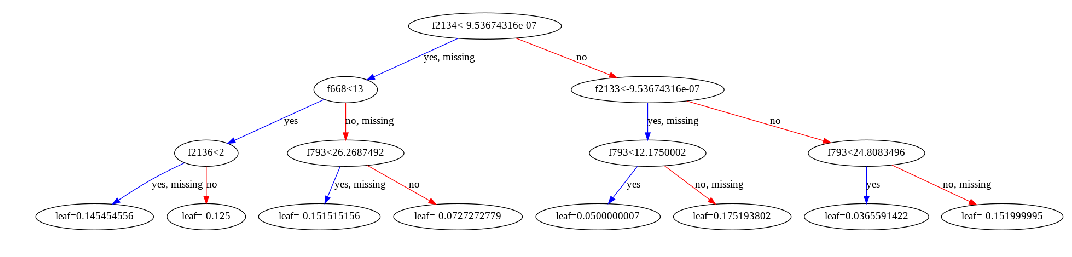

In [0]:
#%matplotlib inline
import xgboost as xgb
from xgboost import plot_tree
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from matplotlib.pylab import gcf

#rcParams['figure.figsize'] = 20,13
plot_tree(clf)
fig = gcf()
fig.set_size_inches(18.5, 10.5)
#plt.show()

# XGBoost 모형의 첫번째 tree를 살펴봄
* 결과에서 나타나다시피, tree가 성별, 나이, 등급(Pclass), 요금 그리고 형제자매+배우자 탑승인원을 체크하고 있음
* 우측 끝단(leaf)을 통해, 이 tree의 판단이 값으로 반환되고, 앙상블 모형인 XGBoost에 의해서 생성된 각 tree들로부터 결정값들이 합산됨

In [0]:
# 모형의 원 (익명화된) 속성명 보관
booster = clf.get_booster()
original_feature_names = booster.feature_names
print(booster.get_dump()[0])

# 벡터화된 데이터 구조의 속성명을 모형 속성명에 설정
booster.feature_names = vec.get_feature_names()
print(booster.get_dump()[0])

# 모형 속성명 원위치
booster.feature_names = original_feature_names

0:[f2134<-9.53674316e-07] yes=1,no=2,missing=1
	1:[f668<13] yes=3,no=4,missing=4
		3:[f2136<2] yes=7,no=8,missing=7
			7:leaf=0.145454556
			8:leaf=-0.125
		4:[f793<26.2687492] yes=9,no=10,missing=9
			9:leaf=-0.151515156
			10:leaf=-0.0727272779
	2:[f2133<-9.53674316e-07] yes=5,no=6,missing=5
		5:[f793<12.1750002] yes=11,no=12,missing=12
			11:leaf=0.0500000007
			12:leaf=0.175193802
		6:[f793<24.8083496] yes=13,no=14,missing=14
			13:leaf=0.0365591422
			14:leaf=-0.151999995

0:[Sex=female<-9.53674316e-07] yes=1,no=2,missing=1
	1:[Age<13] yes=3,no=4,missing=4
		3:[SibSp<2] yes=7,no=8,missing=7
			7:leaf=0.145454556
			8:leaf=-0.125
		4:[Fare<26.2687492] yes=9,no=10,missing=9
			9:leaf=-0.151515156
			10:leaf=-0.0727272779
	2:[Pclass=3<-9.53674316e-07] yes=5,no=6,missing=5
		5:[Fare<12.1750002] yes=11,no=12,missing=12
			11:leaf=0.0500000007
			12:leaf=0.175193802
		6:[Fare<24.8083496] yes=13,no=14,missing=14
			13:leaf=0.0365591422
			14:leaf=-0.151999995



In [0]:
!pip install eli5

    100% |████████████████████████████████| 102kB 2.7MB/s 


##ELI5.show_weights()
* 분류기의 입력 속성별 Weight을 IPython.display.HTML 객체로 반환해줌
* Weight은 각 속성이 모든 tree들의 최종 예측에 얼마나 기여했는지에 대한 정량화된 지표값임
* Weight 계산 방식은 다음 url에 상술되어 있음:  http://blog.datadive.net/interpreting-random-forests/
*  Weight을 계산하는 몇 가지 방식 중 세 가지가 제공됨
   1. gain (default 방식) : tree에 사용된 속성별 평균 이득
   2. weight : 데이터를 가르기 위해 속성이 사용된 횟수
   3. cover : the average coverage of the feature

* 성별(Sex=female)과 등급(Pclass=3) 두 개가 가장 중요한 속성으로 나타남
* 그러나, XGBoost 어째서 그와 같은 판단을 내렸는지에 대해선 알 수 없음


In [0]:
from eli5 import show_weights
from IPython.display import display


display(show_weights(clf, vec=vec, importance_type='gain', top=10))

Weight,Feature
0.4278,Sex=female
0.1949,Pclass=3
0.0665,Embarked=S
0.0510,Pclass=2
0.0420,SibSp
0.0417,Cabin=
0.0385,Embarked=C
0.0358,Ticket=1601
0.0331,Age
0.0323,Fare


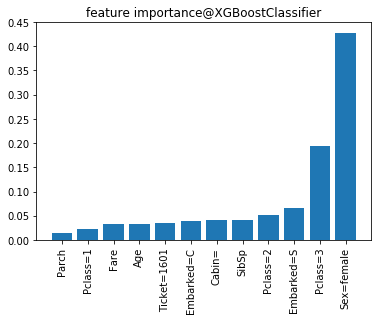

In [0]:
import pandas as pd

def draw_bar(chart_name, feature_names, feature_values):
  import matplotlib.pyplot as plt
  import numpy as np
  
  y = feature_values
  x = np.arange(len(y))
  xlabel = feature_names
  plt.title(chart_name)
  plt.xticks(x, xlabel, rotation=90)
  plt.bar(x, y)
  plt.show()

  
ll = list(zip(vec.get_feature_names(), clf.feature_importances_))
sd = sorted(ll, key=lambda x: x[1])

df =pd.DataFrame(sd)

df = df[df[1] > 0]

draw_bar('feature importance@XGBoostClassifier', df[0].values, df[1].values)

##ELI5.show_prediction()
* 분류기의 예측에 대한 설명을 IPython.display.HTML 객체로 반환해줌

In [0]:
#특정 입력값
valid_xs[1]

{'': '44',
 'Age': 19.0,
 'Cabin': '',
 'Embarked': 'Q',
 'Fare': 7.8792,
 'Name': 'Devaney, Miss. Margaret Delia',
 'Parch': 0,
 'PassengerId': '45',
 'Pclass': '3',
 'Sex': 'female',
 'SibSp': 0,
 'Ticket': '330958'}

* 아래 결과에 따르면, 이 분류기는, 성별이 여성인 승객이란 점이 양(+)의 기여도를 갖으나, 승객 등급이 3등급인 것은 음(-)의 기여도를 갖는 것으로 판단하고 있음을 알 수 있음 
* show_feature_values=True 옵션을 주어 어떤 속성들이 결측 상태인지도 확인되고 있는데,  pipeline 내 vectorized 과정에서 생성된 속성 "Embarked=S"가 결측 상태이고 다행히 양(+)의 기여를 한 것으로 나타남  ※ 이 승객의 탑승 지역('Embarked')이 'Q'(Queenstown)임

In [0]:
# 검증용 데이터 1개 (valid_xs[1]) 로 예측 모형 테스트

from eli5 import show_prediction
from IPython.display import display

display(show_prediction(clf, valid_xs[1], vec=vec, show_feature_values=True))

## 결측치가 없는 속성들의 기여도 보기

In [0]:
# ... 옵션 feature_filter에 내정된 lambda 함수 no_missing를 인자로 넘김

no_missing = lambda feature_name, feature_value: not np.isnan(feature_value)
show_prediction(clf, valid_xs[0], vec=vec, show_feature_values=True, feature_filter=no_missing)

SHAP

